<a href="https://colab.research.google.com/github/Tim3s/PL-teamproject-dataprocessing/blob/main/PL_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
user_profile_csv = pd.read_excel("drive/MyDrive/PL_team_project/user_profile.xlsx")
user_profile_csv.head()

,id,sex,age
0,228,F,80
1,230,F,73
2,232,M,84
3,273,F,83
4,276,F,56


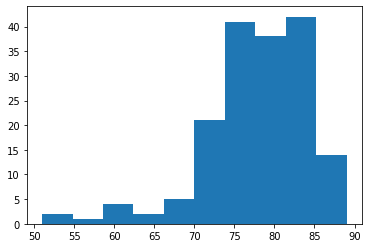

In [3]:
plt.hist(user_profile_csv['age'])
plt.show()

In [4]:
print(np.unique(user_profile_csv['sex'], return_counts=True))

(array(['F', 'M'], dtype=object), array([130,  40]))


In [5]:
import datetime as dt

In [43]:
state = np.array("TV 보기' '간식 먹기' '간편식 준비하기' '귀가하기' '기상 약 복용' '기상하기' '꿀잠소리' '날씨 확인하기' '낮잠 기상하기' '낮잠자기' '냉장고 정리하기' '노래자랑' '뉴스 시청' '늦은 기상하기' '도전 실버벨' '듣는대화' '마음그림터' '마음세탁소' '마음스트레칭' '명언산책' '무비순이' '밥솥 열기' '밥솥 정리하기' '새벽 TV 시청' '새벽 간식' '새벽 화장실 이용' '석식' '설거지 하기' '수면' '순이 특별대화' '순이극장' '순이대화' '순이인생' '순이책방' '순이체조' '시낭독' '시시콜콜' '식사' '식사 중 TV 시청' '식후 약 복용' '실내운동하기' '실외운동하기' '야식 먹기' '영어교실' '외출하기' '요가명상' '운동 후 귀가' '음식 꺼내기' '이른 기상하기' '일반 약 복용' '일어교실' '전자렌지 청소하기' '조식' '주방 정리하기' '중식' '집 환기하기' '취미활동' '화장실 이용".split("' '"))
active = np.array("냉장고' '리모콘' '매우 활동' '물' '미동' '밥솥' '변기' '부동' '식사 판단' '싱크대' '약' '외출' '전자렌지' '창문' '책상' '프로그램' '현관문' '화장실' '활동".split("' '"))
program = np.array("꿀잠소리' '노래자랑' '도전 실버벨' '듣는대화' '마음그림터' '마음세탁소' '마음스트레칭' '명언산책' '무비순이' '순이 특별대화' '순이극장' '순이대화' '순이인생' '순이책방' '순이체조' '시낭독' '시시콜콜' '영어교실' '요가명상' '일어교실".split("' '"))
print(state)
print(active)
print(program)

['TV 보기' '간식 먹기' '간편식 준비하기' '귀가하기' '기상 약 복용' '기상하기' '꿀잠소리' '날씨 확인하기'
 '낮잠 기상하기' '낮잠자기' '냉장고 정리하기' '노래자랑' '뉴스 시청' '늦은 기상하기' '도전 실버벨' '듣는대화'
 '마음그림터' '마음세탁소' '마음스트레칭' '명언산책' '무비순이' '밥솥 열기' '밥솥 정리하기' '새벽 TV 시청'
 '새벽 간식' '새벽 화장실 이용' '석식' '설거지 하기' '수면' '순이 특별대화' '순이극장' '순이대화' '순이인생'
 '순이책방' '순이체조' '시낭독' '시시콜콜' '식사' '식사 중 TV 시청' '식후 약 복용' '실내운동하기' '실외운동하기'
 '야식 먹기' '영어교실' '외출하기' '요가명상' '운동 후 귀가' '음식 꺼내기' '이른 기상하기' '일반 약 복용'
 '일어교실' '전자렌지 청소하기' '조식' '주방 정리하기' '중식' '집 환기하기' '취미활동' '화장실 이용']
['냉장고' '리모콘' '매우 활동' '물' '미동' '밥솥' '변기' '부동' '식사 판단' '싱크대' '약' '외출' '전자렌지'
 '창문' '책상' '프로그램' '현관문' '화장실' '활동']
['꿀잠소리' '노래자랑' '도전 실버벨' '듣는대화' '마음그림터' '마음세탁소' '마음스트레칭' '명언산책' '무비순이'
 '순이 특별대화' '순이극장' '순이대화' '순이인생' '순이책방' '순이체조' '시낭독' '시시콜콜' '영어교실' '요가명상'
 '일어교실']


In [7]:
user_profile = user_profile_csv.to_numpy()

In [42]:
active_input = []
valid = []
valid_age = []
invalid = []
response_valid = []
response_invalid = []
small_data = []
num_of_conversation = []
no_pattern = []
pattern_valid = []
wake_valid = []
wake_input = []
break_valid = []
break_input = []
lunch_valid = []
lunch_input = []
dinner_valid = []
dinner_input = []
pattern_input = []
program_valid = []
program_input = []
no_program = []
program = []

for ptr in range(len(user_profile_csv)):
    num = user_profile_csv['id'][ptr]
    try:
        data = pd.read_csv('drive/MyDrive/PL_team_project/hs_' + str(num) + '_m08_0903_1355.csv', encoding='cp949')
    except:
        invalid.append(num)
        print('not found:', num)
        continue

    tmp = pd.to_datetime(data['Time'])
    if len(tmp) <= 10:
        small_data.append(num)
        print('not enough data:', num)
        continue
    tmp = tmp[len(tmp)-1] - tmp[0]
    if tmp < dt.timedelta(seconds=86400):
        small_data.append(num)
        print('not enough data:', num)
        continue

    tmp = data['Z'].to_numpy()
    activeness = [np.sum(np.sum((tmp=='매우 활동', tmp=='외출', tmp=='프로그램'), axis=0)>0),\
            np.sum(np.sum((tmp=='활동', tmp=='냉장고', tmp=='밥솥', tmp=='싱크대', tmp=='창문'), axis=0)>0),\
            np.sum(np.sum((tmp=='미동', tmp=='리모콘', tmp=='식사 판단', tmp=='약', tmp=='전자렌지'), axis=0)>0),\
            np.sum(np.sum((tmp=='부동', tmp=='변기'), axis=0)>0)]
    # ['냉장고' '리모콘' '매우 활동' '물' '미동' '밥솥' '변기' '부동' '식사 판단' '싱크대' '약' '외출' '전자렌지'
    # '창문' '프로그램' '현관문' '화장실' '활동']
    if not sum(activeness):
        small_data.append(num)
        print('not enough data:', num)
        continue
    active_input.append((sum([activeness[i] * (4 - i) for i in range(4)]) / sum(activeness)))

    # if ('프로그램' not in tmp):
    #     no_program.append(num)
    # else:
    #     program_valid.append(num)
    #     program += data['State'][tmp=='프로그램'].values.tolist()

    tmp = data['State'].to_numpy()
    if ('기상하기' not in tmp) and ('늦은 기상하기' not in tmp) and ('조식' not in tmp) and ('중식' not in tmp) and ('석식' not in tmp):
        no_pattern.append(num)
    else:
        pattern_valid.append(num)
        if ('기상하기' in tmp) or ('늦은 기상하기' in tmp):
            wake_valid.append(num)
            current = []
            for i in range(len(tmp)):
                if tmp[i] == '기상하기' or tmp[i] == '늦은 기상하기':
                    current.append(pd.to_datetime(data['Time'][i]).to_pydatetime())
                    current[-1] = dt.timedelta(hours=(current[-1].hour if current[-1].hour < 12 else -24 + current[-1].hour), minutes=current[-1].minute).seconds
            wake_input.append(np.std(current))
        if '조식' in tmp:
            break_valid.append(num)
            current = []
            for i in range(len(tmp)):
                if tmp[i] == '조식':
                    current.append(pd.to_datetime(data['Time'][i]).to_pydatetime())
                    current[-1] = dt.timedelta(hours=current[-1].hour, minutes=current[-1].minute).seconds
            break_input.append(np.std(current))
        if '중식' in tmp:
            lunch_valid.append(num)
            current = []
            for i in range(len(tmp)):
                if tmp[i] == '중식':
                    current.append(pd.to_datetime(data['Time'][i]).to_pydatetime())
                    current[-1] = dt.timedelta(hours=current[-1].hour, minutes=current[-1].minute).seconds
            lunch_input.append(np.std(current))
        if '석식' in tmp:
            dinner_valid.append(num)
            current = []
            for i in range(len(tmp)):
                if tmp[i] == '석식':
                    current.append(pd.to_datetime(data['Time'][i]).to_pydatetime())
                    current[-1] = dt.timedelta(hours=current[-1].hour, minutes=current[-1].minute).seconds
            dinner_input.append(np.std(current))

    tmp = [len(data['STT_1'].dropna()), len(data['STT_2'].dropna()), len(data['STT_3'].dropna())]
    response = len([i for i in data['Message_1'].dropna() if i != '프로그램 메시지'])
    if not response:
        response_invalid.append(num)
        tmp.append(0)
        tmp.append(0)
        tmp.append(0)
        tmp.append(0)
        tmp.append(0)
        tmp.append(0)
    else:
        response_valid.append(num)
        tmp.append(response)
        tmp.append(tmp[0] / response * 100 if response else 0)
        response = len([i for i in data['Message_2'].dropna() if i != '프로그램 메시지'])
        tmp.append(response)
        tmp.append(tmp[1] / response * 100 if response else 0)
        response = len([i for i in data['Message_3'].dropna() if i != '프로그램 메시지'])
        tmp.append(response)
        tmp.append(tmp[2] / response * 100 if response else 0)
    num_of_conversation.append(tmp)
    
    # state = np.unique(np.concatenate((np.unique(data['State']), state)))
    # active = np.unique(np.concatenate((active, data['Z'].dropna())))
    valid.append(num)
    valid_age.append(user_profile_csv['age'][ptr])

wake_input = np.array(wake_input) / max(wake_input)
break_input = np.array(break_input) / max(break_input)
lunch_input = np.array(lunch_input) / max(lunch_input)
dinner_input = np.array(dinner_input) / max(dinner_input)
wakeptr = breakptr = lunchptr = dinnerptr = 0
for num in pattern_valid:
    current = []
    if wakeptr < len(wake_valid) and wake_valid[wakeptr] == num:
        current.append(1 - wake_input[wakeptr])
        wakeptr += 1
    if breakptr < len(break_valid) and break_valid[breakptr] == num:
        current.append(1 - break_input[breakptr])
        breakptr += 1
    if lunchptr < len(lunch_valid) and lunch_valid[lunchptr] == num:
        current.append(1 - lunch_input[lunchptr])
        lunchptr += 1
    if dinnerptr < len(dinner_valid) and dinner_valid[dinnerptr] == num:
        current.append(1 - dinner_input[dinnerptr])
        dinnerptr += 1
    pattern_input.append(np.mean(current) * 100)

active_input = np.array(active_input)
state.sort()
# print(state)
# active.sort()
# print(active)
print(valid)
print(pattern_valid)
print(pattern_input)
print(len(no_pattern), no_pattern)
print(len(wake_valid), len(break_valid), len(lunch_valid), len(dinner_valid))
print(np.max(wake_input), np.max(break_input), np.max(lunch_input), np.max(dinner_input))
# print(np.unique(sorted(program)))

program detected
program detected
not enough data: 273
program detected
program detected
program detected
program detected
not enough data: 342
program detected
program detected
program detected
program detected
program detected
program detected
program detected
program detected
program detected
not enough data: 504
program detected
not enough data: 509
program detected
program detected
program detected
program detected
not enough data: 530
not enough data: 532
program detected
program detected
not enough data: 537
not enough data: 538
not enough data: 540
program detected
program detected
program detected
program detected
not enough data: 552
program detected
not enough data: 574
program detected
program detected
program detected
not enough data: 633
not enough data: 635
not enough data: 636
program detected
program detected
program detected
not enough data: 653
program detected
program detected
program detected
program detected
not enough data: 664
program detected
not enough data: 6

56 89


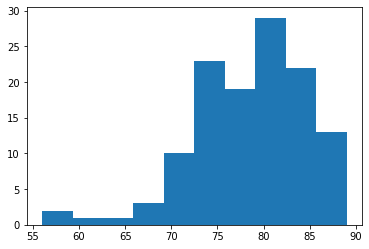

In [12]:
plt.hist(valid_age)
print(np.min(valid_age), np.max(valid_age))

67.43559225968852 10.425481275417491 100.0
1036


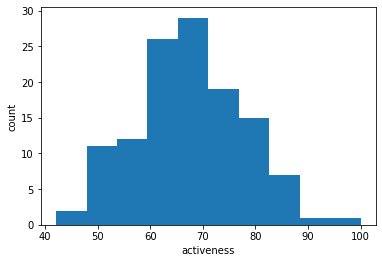

In [11]:
active_input = active_input / np.max(active_input) * 100
print(np.mean(active_input), np.std(active_input), np.max(active_input))
print(valid[np.argmax(active_input)])
plt.hist(active_input)
plt.xlabel('activeness')
plt.ylabel('count')
plt.show()
# active_input /= np.max(active_input)

In [13]:
fifty_active = []
sixty_active = []
seventy_active = []
eighty_active = []
for i in range(len(valid_age)):
    if valid_age[i] < 60:
        fifty_active.append(active_input[i])
    elif valid_age[i] < 70:
        sixty_active.append(active_input[i])
    elif valid_age[i] < 80:
        seventy_active.append(active_input[i])
    else:
        eighty_active.append(active_input[i])
fifty_active.sort()
sixty_active.sort()
seventy_active.sort()
eighty_active.sort()

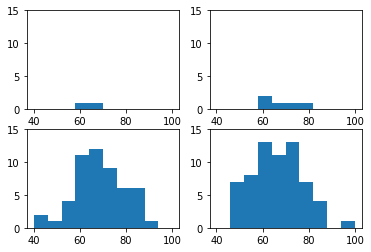

In [14]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(fifty_active, range=(40, 100))
axs[0, 0].set_ylim((0, 15))
axs[0, 1].hist(sixty_active, range=(40, 100))
axs[0, 1].set_ylim((0, 15))
axs[1, 0].hist(seventy_active, range=(40, 100))
axs[1, 0].set_ylim((0, 15))
axs[1, 1].hist(eighty_active, range=(40, 100))
axs[1, 1].set_ylim((0, 15))
plt.show()

In [15]:
state_input = np.empty(shape=(0, len(state)))
for num in valid:
    data = pd.read_csv('drive/MyDrive/PL_team_project/hs_' + str(num) + '_m08_0903_1355.csv', encoding='cp949')
    result = np.sum([state==i for i in data['State']], axis=0)
    result = result / np.sum(result)
    # print(result)
    # print(np.array([result]))
    # print(state_input)
    state_input = np.append(state_input, np.array([result]), axis=0)

In [16]:
print(state)
print(state_input)

['TV 보기' '간식 먹기' '간편식 준비하기' '귀가하기' '기상 약 복용' '기상하기' '꿀잠소리' '날씨 확인하기'
 '낮잠 기상하기' '낮잠자기' '냉장고 정리하기' '노래자랑' '뉴스 시청' '늦은 기상하기' '도전 실버벨' '듣는대화'
 '마음그림터' '마음세탁소' '마음스트레칭' '명언산책' '무비순이' '밥솥 열기' '밥솥 정리하기' '새벽 TV 시청'
 '새벽 간식' '새벽 화장실 이용' '석식' '설거지 하기' '수면' '순이 특별대화' '순이극장' '순이대화' '순이인생'
 '순이책방' '순이체조' '시낭독' '시시콜콜' '식사' '식사 중 TV 시청' '식후 약 복용' '실내운동하기' '실외운동하기'
 '야식 먹기' '영어교실' '외출하기' '요가명상' '운동 후 귀가' '음식 꺼내기' '이른 기상하기' '일반 약 복용'
 '일어교실' '전자렌지 청소하기' '조식' '주방 정리하기' '중식' '집 환기하기' '취미활동' '화장실 이용']
[[0.         0.0070922  0.         ... 0.0141844  0.28368794 0.        ]
 [0.25       0.15277778 0.175      ... 0.         0.025      0.        ]
 [0.         0.26648352 0.06868132 ... 0.22802198 0.         0.        ]
 ...
 [0.09751037 0.02697095 0.         ... 0.00207469 0.08091286 0.03526971]
 [0.17175573 0.00954198 0.00572519 ... 0.00572519 0.18129771 0.01145038]
 [0.03836317 0.02429668 0.         ... 0.         0.10230179 0.        ]]


In [17]:
from sklearn.cluster import KMeans

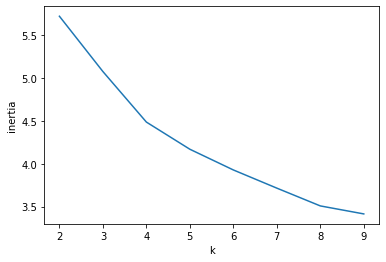

In [18]:
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(state_input)
    inertia.append(km.inertia_)
plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

[  230   490   494   512   518   519   534   536   581   644   672   720
   768   796   800   802   806   811   812  1003  1004  1012  1018  1021
  1026  1028  1033  1040  1042  1052  1055  1057  1059  1061  1062 30016
 30035 30038 30039 30041 30046 30058]
[  232   276   476   479   486   495   520   535   542   544   570   585
   654   655   658   668   797   799   801   803   805   807   809   813
  1001  1002  1008  1009  1016  1036  1046  1048  1053 30040 30045]
[ 228  339  477  488  492  496  527  580  582  583  642  656  661  662
 1015 1027 1029 1037 1043 1047]
[  315   341   505   511   513   546   547   650   665   673   705   760
  1013  1019  1020  1022  1030  1032  1050  1054 30048 30050 30053 30055
 30056 30063]
num of people in cluster: 42
mostly done activity: TV 보기


num of people in cluster: 35
mostly done activity: 음식 꺼내기


num of people in cluster: 20
mostly done activity: 취미활동


num of people in cluster: 26
mostly done activity: 외출하기




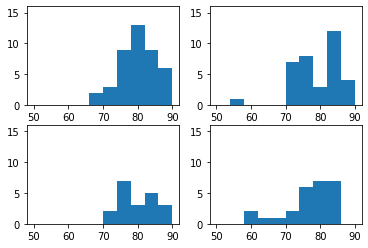

In [19]:
km = KMeans(n_clusters=4)
km.fit(state_input)
valid = np.array(valid)
for i in range(km.n_clusters):
    print(valid[km.labels_==i])
for i in range(km.n_clusters):
    print('num of people in cluster:', np.sum(km.labels_==i))
    print('mostly done activity:', state[np.argmax(np.mean(state_input[km.labels_==i], axis=0))])
    # print(np.round(np.mean(state_input[km.labels_==i], axis=0), 3))
    # print(np.round(np.std(state_input[km.labels_==i], axis=0), 3))
    print('\n')
user_profile = user_profile_csv.to_numpy()
fig, axs = plt.subplots((km.n_clusters + 1) // 2, 2)
for i in range(km.n_clusters):
    tmp = valid[km.labels_==i]
    axs[i // 2, i % 2].hist([user_profile[j][2] for j in range(len(user_profile)) if user_profile[j][0] in tmp], range=(50, 90))
    axs[i // 2, i % 2].set_ylim([0, 16])
plt.show()

In [20]:
f = open('drive/MyDrive/PL_team_project/processed_data/overall_validness.csv', 'w')
f.write('id,validness')
for id in user_profile_csv['id']:
    if id in invalid:
        f.write('\n' + str(id) + ',invalid')
    elif id in small_data:
        f.write('\n' + str(id) + ',too small data')
    else:
        f.write('\n' + str(id) + ',valid')
f.close()

In [21]:
f = open('drive/MyDrive/PL_team_project/processed_data/active_frequency.csv', 'w')
f.write(','.join(state))
f.write('\n')
f.write(','.join(map(str, np.mean(state_input, axis=0))))
f.close()

In [22]:
in_act = ['TV 보기']
hobby = ['취미활동']
basic = ['음식 꺼내기']
out_act = ['외출하기']
classify = {'실내활동': [], '야외활동': [], '일상활동': [], '취미활동': []}
for i in range(km.n_clusters):
    if state[np.argmax(np.mean(state_input[km.labels_==i], axis=0))] in in_act:
        classify['실내활동'] = np.append(classify['실내활동'], valid[km.labels_==i])
    elif state[np.argmax(np.mean(state_input[km.labels_==i], axis=0))] in out_act:
        classify['야외활동'] = np.append(classify['야외활동'], valid[km.labels_==i])
    elif state[np.argmax(np.mean(state_input[km.labels_==i], axis=0))] in hobby:
        classify['취미활동'] = np.append(classify['취미활동'], valid[km.labels_==i])
    elif state[np.argmax(np.mean(state_input[km.labels_==i], axis=0))] in basic:
        classify['일상활동'] = np.append(classify['일상활동'], valid[km.labels_==i])
f = open('drive/MyDrive/PL_team_project/processed_data/cluster.csv', 'w')
f.write('id,activity')
for id in valid:
    written = False
    for key in classify:
        if id in classify[key]:
            f.write('\n' + str(id) + ',' + key)
            written = True
            break
    if not written:
        f.write('\n' + str(id) + ',classify failed')
f.close()

In [23]:
from bisect import bisect_right
f = open('drive/MyDrive/PL_team_project/processed_data/activeness.csv', 'w')
f.write('id,age,score,rank,total')
for i in range(len(valid)):
    if valid_age[i] < 60:
        f.write('\n' + str(valid[i]) + ',50,' + str(active_input[i]) + ',' + str(len(fifty_active) - bisect_right(fifty_active, active_input[i]) + 1) + ',' + str(len(fifty_active)))
    elif valid_age[i] < 70:
        f.write('\n' + str(valid[i]) + ',60,' + str(active_input[i]) + ',' + str(len(sixty_active) - bisect_right(sixty_active, active_input[i]) + 1) + ',' + str(len(sixty_active)))
    elif valid_age[i] < 80:
        f.write('\n' + str(valid[i]) + ',70,' + str(active_input[i]) + ',' + str(len(seventy_active) - bisect_right(seventy_active, active_input[i]) + 1) + ',' + str(len(seventy_active)))
    else:
        f.write('\n' + str(valid[i]) + ',80,' + str(active_input[i]) + ',' + str(len(eighty_active) - bisect_right(eighty_active, active_input[i]) + 1) + ',' + str(len(eighty_active)))
f.close()

In [24]:
f = open('drive/MyDrive/PL_team_project/processed_data/regularity.csv', 'w')
f.write('id,validness,score')
for id in valid:
    if id in no_pattern:
        f.write('\n' + str(id) + ',0,0')
        continue
    f.write('\n' + str(id) + ',1,' + str(pattern_input[pattern_valid.index(id)]))
f.close()

In [25]:
f = open('drive/MyDrive/PL_team_project/processed_data/response.csv', 'w')
f.write('id,validness,response1,response2,response3,total1,percentage1,total2,percentage2,total3,percentage3')
for i in range(len(valid)):
    id = valid[i]
    f.write('\n' + str(id) + ',' + str(int(id not in response_invalid)) + ',' + ','.join(map(str, num_of_conversation[i])))
f.close()

In [35]:
a = np.array(['가', '나', '다'])
print(a)
print('가' in a)

['가' '나' '다']
True
